In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd

sns.set(style="darkgrid")
pd.set_option("display.precision", 10)

# Mengambil directory dan input file awal

In [2]:
cwd = os.getcwd()
input_dir = os.path.join(cwd, 'input')
output_dir = os.path.join(cwd, 'output')
features = os.path.join(output_dir, 'features_without_high_correlated_value.csv')
features_performance = os.path.join(output_dir, 'features_performance_with_estimators.csv')

In [3]:
df = pd.read_csv(features_performance)

In [4]:
df

,number_of_features,estimators,accuracy_score,rmse,confusion_matriks
0,1,10 Trees,0.8362204724,0.4046968341,[[245 16 0]\n [ 35 237 12]\n [ 0 41 49]]
1,2,10 Trees,0.9102362205,0.2996060405,[[255 6 0]\n [ 36 237 11]\n [ 0 4 86]]
2,3,10 Trees,0.9291338583,0.2662069528,[[252 9 0]\n [ 21 254 9]\n [ 0 6 84]]
3,4,10 Trees,0.9527559055,0.2173570668,[[255 6 0]\n [ 18 261 5]\n [ 0 1 89]]
4,5,10 Trees,0.9527559055,0.2173570668,[[255 6 0]\n [ 16 261 7]\n [ 0 1 89]]
...,...,...,...,...,...
1065,103,100 Trees,0.9889763780,0.1049934381,[[259 2 0]\n [ 5 279 0]\n [ 0 0 90]]
1066,104,100 Trees,0.9842519685,0.1254911610,[[258 3 0]\n [ 7 277 0]\n [ 0 0 90]]
1067,105,100 Trees,0.9858267717,0.1374686793,[[260 1 0]\n [ 7 277 0]\n [ 1 0 89]]
1068,106,100 Trees,0.9874015748,0.1122427067,[[259 2 0]\n [ 6 278 0]\n [ 0 0 90]]


In [5]:
estimators = df['estimators'].unique()
estimators_split = np.split(estimators, 2)

estimators_split

[array(['10 Trees', '20 Trees', '30 Trees', '40 Trees', '50 Trees'],
       dtype=object),
 array(['60 Trees', '70 Trees', '80 Trees', '90 Trees', '100 Trees'],
       dtype=object)]

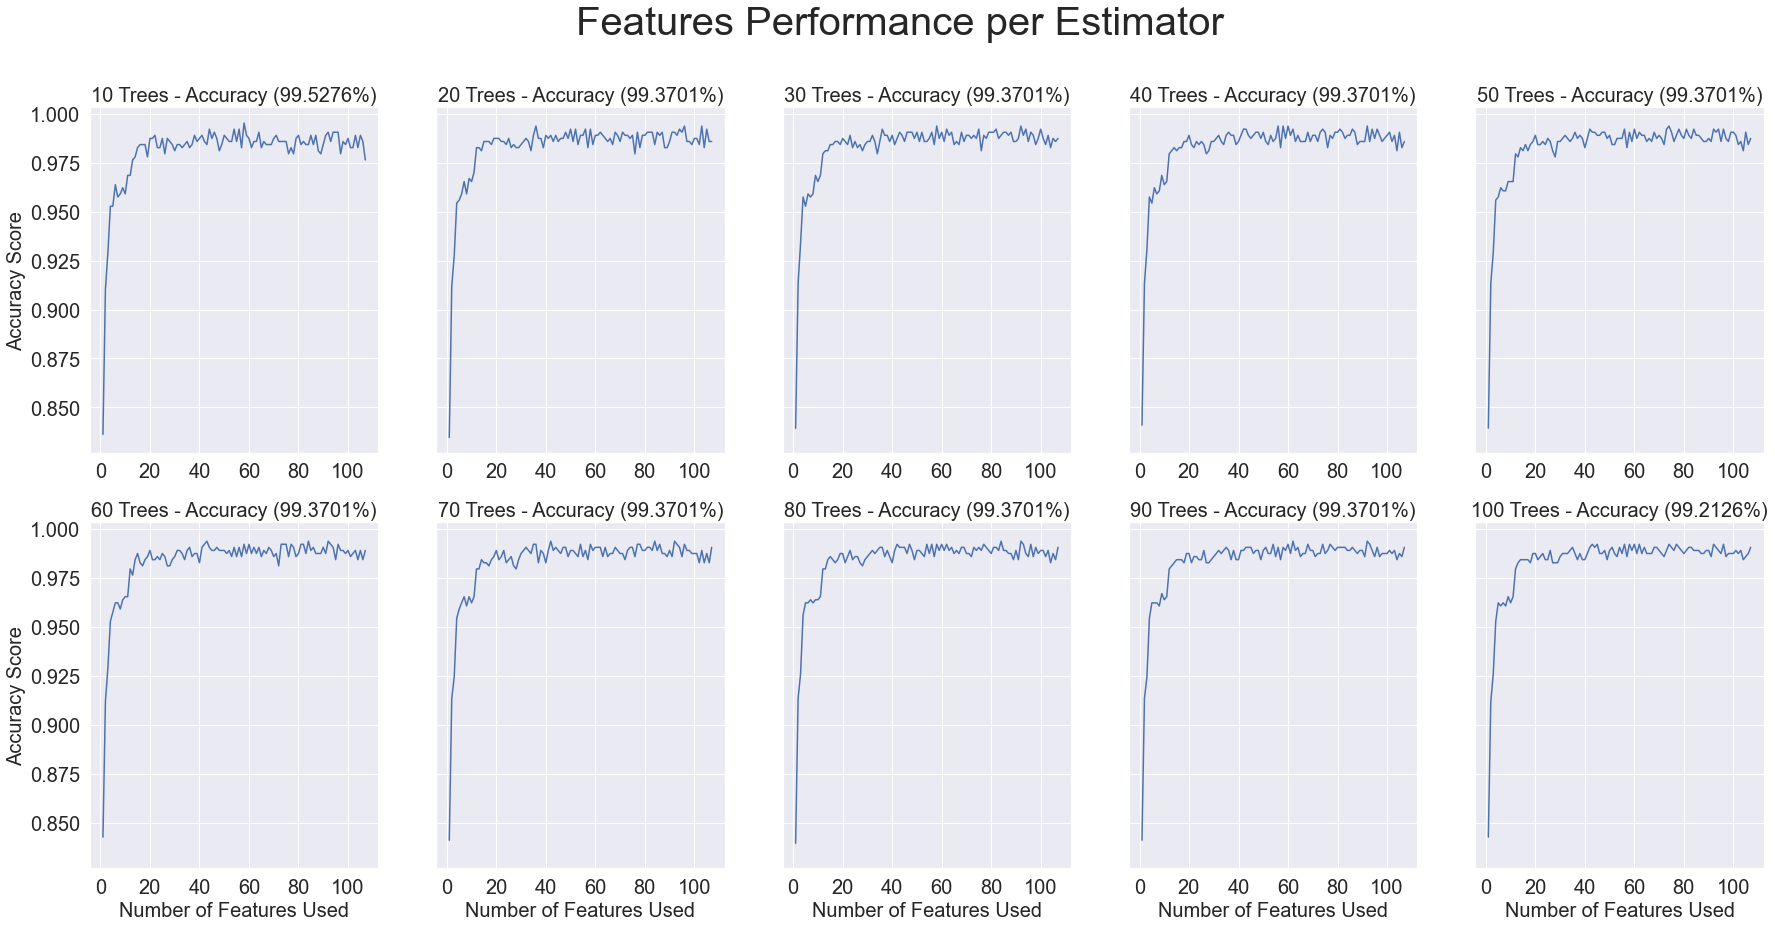

In [7]:
nrows = len(estimators_split)
ncols = len(estimators_split[0])
filename = os.path.join(output_dir, 'features_performance_per_estimators.tiff')
filename_jpg = os.path.join(output_dir, 'features_performance_per_estimators.jpg')

fig, ax = plt.subplots(
    figsize=(30, 14), 
    ncols=ncols, 
    nrows=nrows, 
    sharey=True,
)

fig.suptitle('Features Performance per Estimator', fontsize=40)

for row in range(nrows):
    for col in range(ncols):
        data = df[df['estimators'] == estimators_split[row][col]]
        
        sns.lineplot(x='number_of_features', y='accuracy_score', data=data, ax=ax[row][col])
        ax[row][col].set_xticks(range(0,108,20))
        ax[row][col].set_title('{} - Accuracy ({:.4f}%)'.format(estimators_split[row][col], data['accuracy_score'].max()*100), fontsize=20)
        if row == 1:
            ax[row][col].set_xlabel('Number of Features Used', fontsize=20)
        else:
            ax[row][col].set_xlabel(None)
        ax[row][col].set_ylabel('Accuracy Score', fontsize=20)
        ax[row][col].tick_params(axis='both', which='major', labelsize=20)
        
plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.savefig(filename_jpg, dpi=300, bbox_inches='tight')
plt.show()

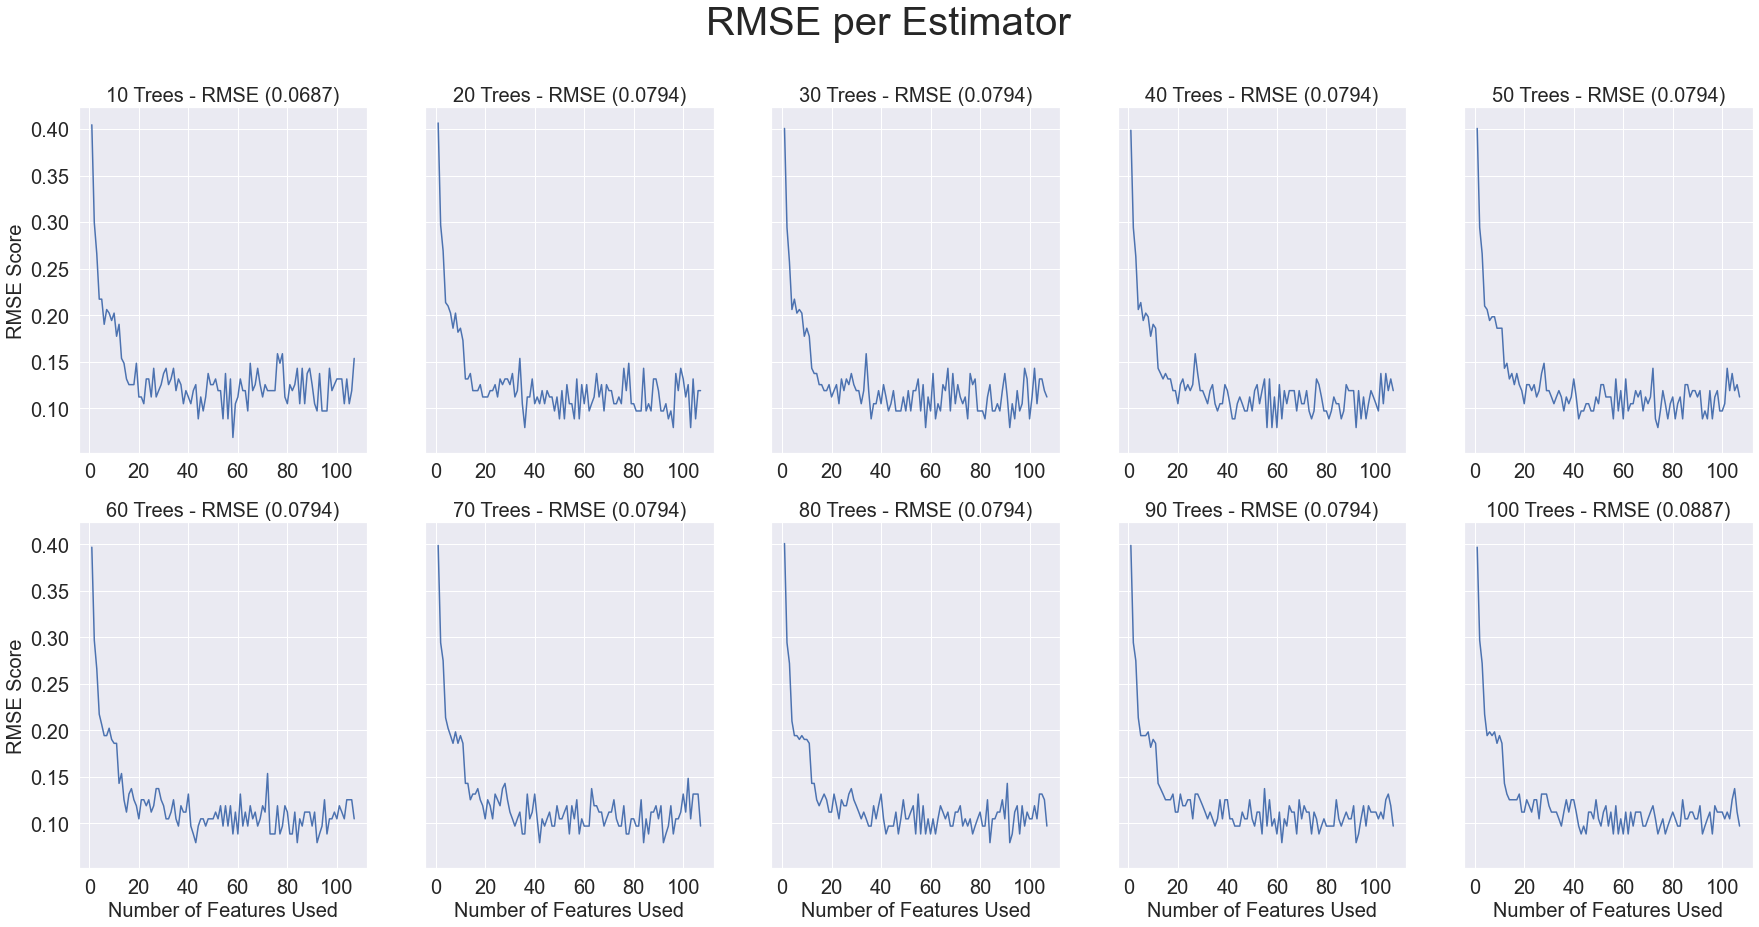

In [9]:
nrows = len(estimators_split)
ncols = len(estimators_split[0])
filename = os.path.join(output_dir, 'features_performance_per_estimators_rmse.tiff')
filename_jpg = os.path.join(output_dir, 'features_performance_per_estimators_rmse.jpg')

fig, ax = plt.subplots(
    figsize=(30, 14), 
    ncols=ncols, 
    nrows=nrows, 
    sharey=True,
)

fig.suptitle('RMSE per Estimator', fontsize=40)

for row in range(nrows):
    for col in range(ncols):
        data = df[df['estimators'] == estimators_split[row][col]]
        
        sns.lineplot(x='number_of_features', y='rmse', data=data, ax=ax[row][col])
        ax[row][col].set_xticks(range(0,108,20))
        ax[row][col].set_title('{} - RMSE ({:.4f})'.format(estimators_split[row][col], data['rmse'].min()), fontsize=20)
        if row == 1:
            ax[row][col].set_xlabel('Number of Features Used', fontsize=20)
        else:
            ax[row][col].set_xlabel(None)
        ax[row][col].set_ylabel('RMSE Score', fontsize=20)
        ax[row][col].tick_params(axis='both', which='major', labelsize=20)
        
plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.savefig(filename_jpg, dpi=300, bbox_inches='tight')
plt.show()

In [80]:
def get_stats(dataframe, estimator):
    df_estimator = dataframe[dataframe['estimators'] == estimator]
    
    maximum = df_estimator['accuracy_score'].max()
    minimum = df_estimator['accuracy_score'].min()
    
    rmse_maximum = df_estimator['rmse'].max()
    rmse_minimum = df_estimator['rmse'].min()
    
    number_features_max_accuracy = df_estimator[df_estimator['accuracy_score'] == maximum]['number_of_features'].to_list()[0]
    number_features_min_accuracy = df_estimator[df_estimator['accuracy_score'] == minimum]['number_of_features'].to_list()[0]
    
    number_features_max_rmse = df_estimator[df_estimator['rmse'] == rmse_maximum]['number_of_features'].to_list()[0]
    number_features_min_rmse = df_estimator[df_estimator['rmse'] == rmse_minimum]['number_of_features'].to_list()[0]
    
    precision = maximum - minimum
    
    return [
        estimator, 
        number_features_max_accuracy, 
        maximum, 
        number_features_min_accuracy,
        minimum, 
        number_features_max_rmse, 
        rmse_maximum,
        number_features_min_rmse,
        rmse_minimum, 
        precision
    ]

In [81]:
result = []

for estimator in estimators:
    result.append(get_stats(df, estimator))

In [82]:
result = pd.DataFrame(result, columns=[
    'estimators',
    'number_features_max_accuracy',
    'maximum_accuracy',
    'number_features_min_accuracy',
    'minimum_accuracy',
    'number_features_max_rmse',
    'rmse_maximum',
    'number_features_min_rmse',
    'rmse_minimum',
    'precision'])

In [83]:
result

,estimators,number_features_max_accuracy,maximum_accuracy,number_features_min_accuracy,minimum_accuracy,number_features_max_rmse,rmse_maximum,number_features_min_rmse,rmse_minimum,precision
0,10 Trees,58,0.9952755906,1,0.8362204724,1,0.4046968341,58,0.0687343397,0.1590551181
1,20 Trees,36,0.9937007874,1,0.8346456693,1,0.4066378373,36,0.0793675790,0.1590551181
2,30 Trees,58,0.9937007874,1,0.8393700787,1,0.4007866281,58,0.0793675790,0.1543307087
3,40 Trees,56,0.9937007874,1,0.8409448819,1,0.3988171487,56,0.0793675790,0.1527559055
4,50 Trees,74,0.9937007874,1,0.8393700787,1,0.4007866281,74,0.0793675790,0.1543307087
5,60 Trees,43,0.9937007874,1,0.8425196850,1,0.3968378951,43,0.0793675790,0.1511811024
6,70 Trees,42,0.9937007874,1,0.8409448819,1,0.3988171487,42,0.0793675790,0.1527559055
7,80 Trees,84,0.9937007874,1,0.8393700787,1,0.4007866281,84,0.0793675790,0.1543307087
8,90 Trees,62,0.9937007874,1,0.8409448819,1,0.3988171487,62,0.0793675790,0.1527559055
9,100 Trees,43,0.9921259843,1,0.8425196850,1,0.3968378951,43,0.0887356509,0.1496062992


In [65]:
result.to_csv(os.path.join(output_dir, 'features_performance_per_estimators.csv'), index=False)

In [66]:
print('Nilai Maximum Accuracy : {}'.format(result['maximum_accuracy'].max()))
print('Nilai Minimum Accuracy : {}'.format(result['maximum_accuracy'].min()))

Nilai Maximum Accuracy : 0.9952755905511812
Nilai Minimum Accuracy : 0.9921259842519684


In [67]:
print('Nilai Maximum RMSE : {}'.format(result['rmse_minimum'].max()))
print('Nilai Minimum RMSE : {}'.format(result['rmse_minimum'].min()))

Nilai Maximum RMSE : 0.0887356509416113
Nilai Minimum RMSE : 0.068734339662347


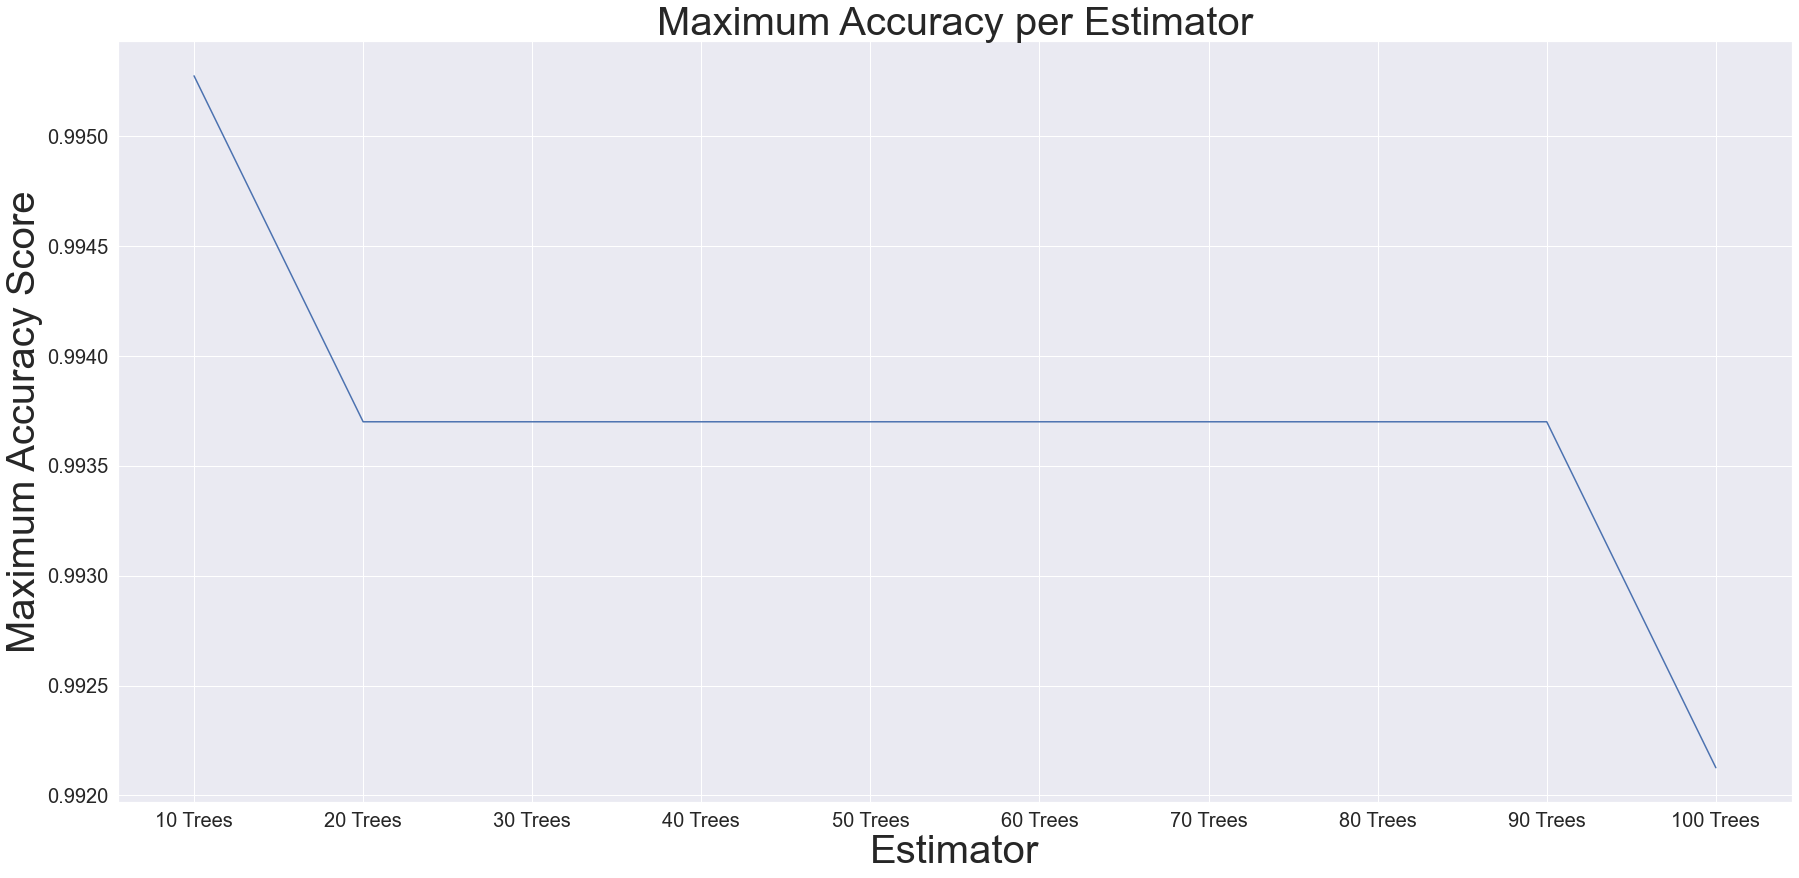

In [73]:
f, ax = plt.subplots(figsize=(30, 14))
filename = os.path.join(output_dir, 'features_performance_with_estimators_maximum.tiff')

ax = sns.lineplot(
    x='estimators', 
    y='maximum_accuracy', 
    data=result,
)

ax.set_title('Maximum Accuracy per Estimator', fontsize=40)
ax.set_xlabel('Estimator', fontsize=40)
ax.set_ylabel('Maximum Accuracy Score', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.show()

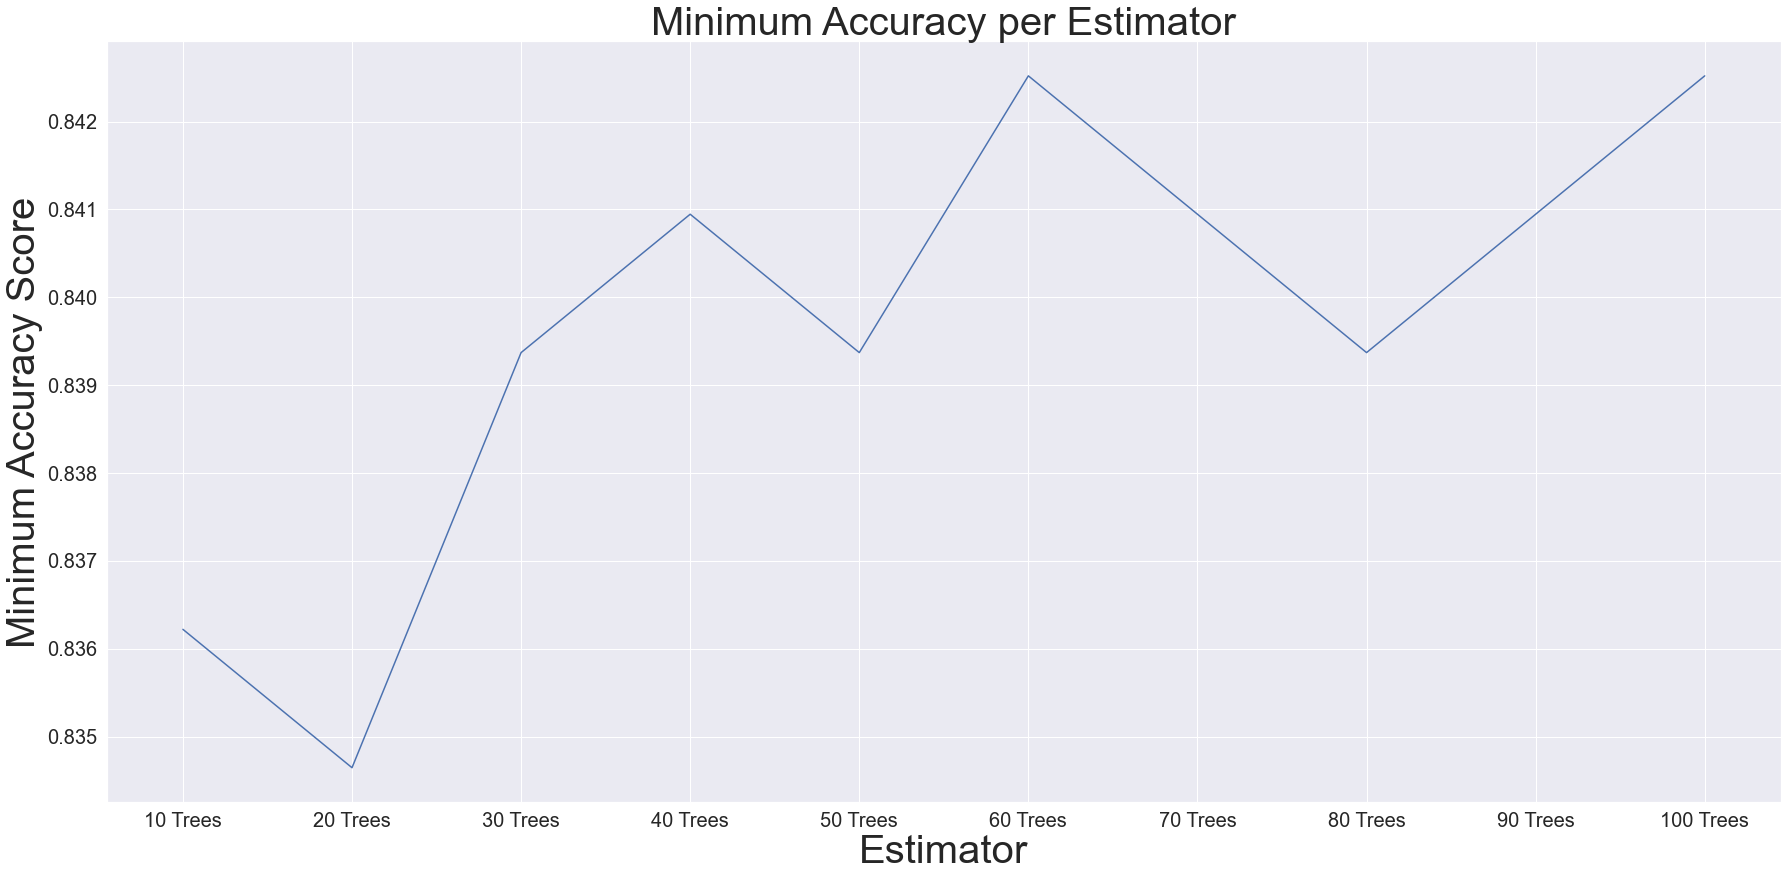

In [74]:
f, ax = plt.subplots(figsize=(30, 14))
filename = os.path.join(output_dir, 'features_performance_with_estimators_minimum.tiff')

ax = sns.lineplot(
    x='estimators', 
    y='minimum_accuracy', 
    data=result,
)

ax.set_title('Minimum Accuracy per Estimator', fontsize=40)
ax.set_xlabel('Estimator', fontsize=40)
ax.set_ylabel('Minimum Accuracy Score', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.show()

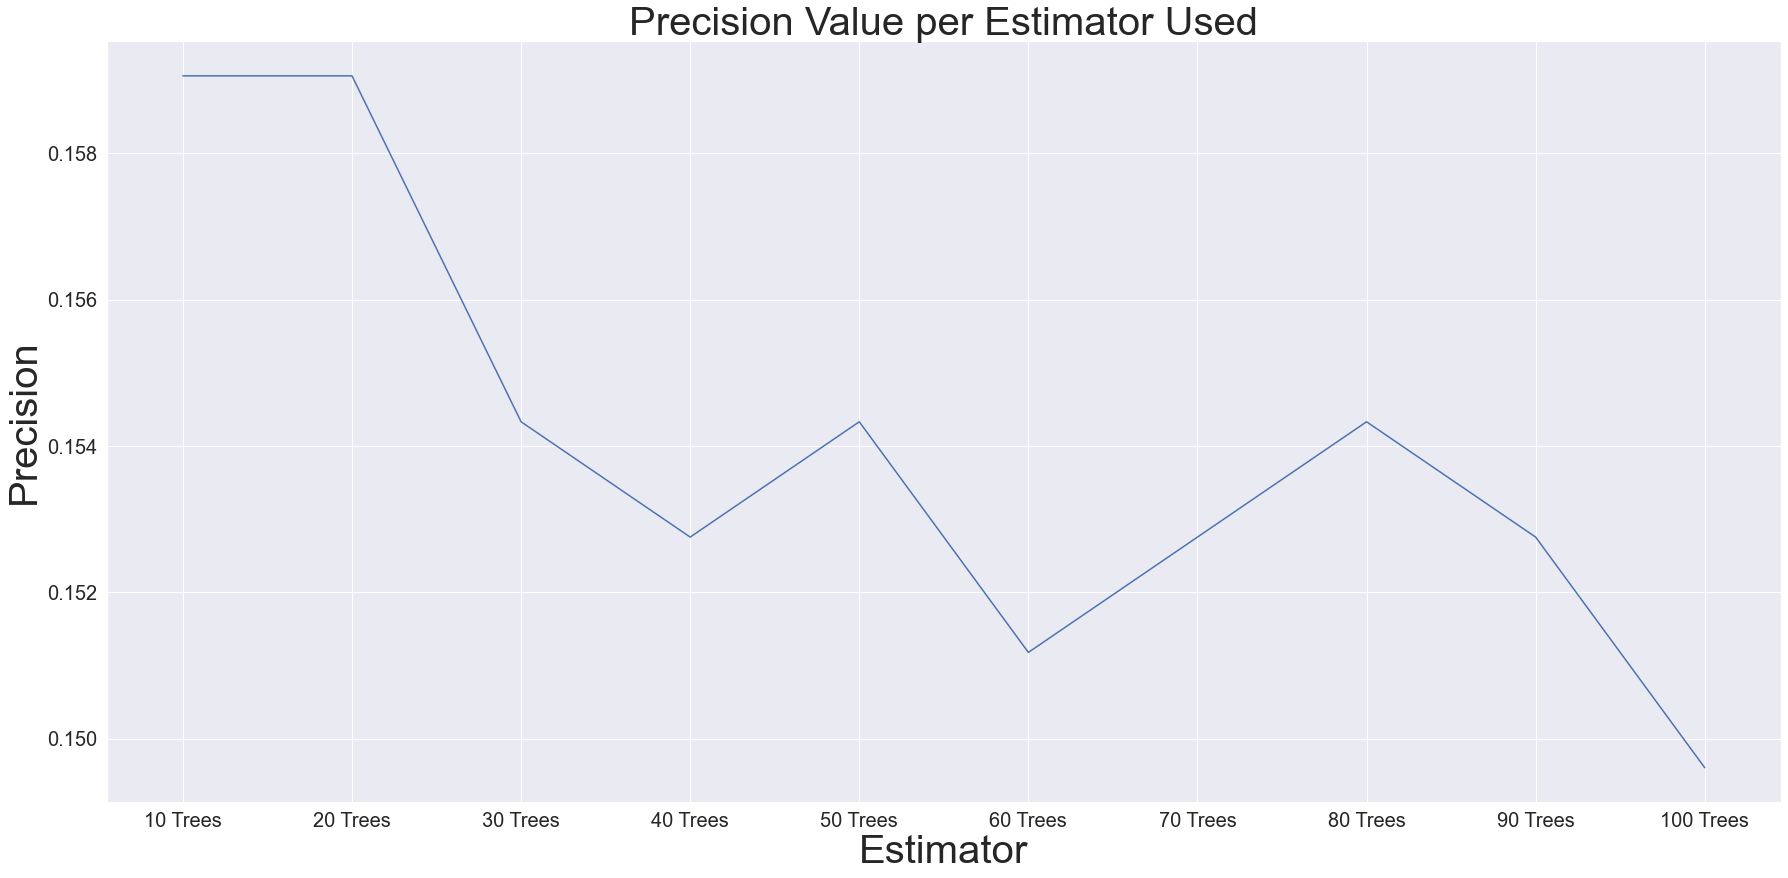

In [75]:
f, ax = plt.subplots(figsize=(30, 14))
filename = os.path.join(output_dir, 'features_performance_with_estimators_precision.tiff')

ax = sns.lineplot(
    data = result, 
    x = "estimators", 
    y = "precision",
)

ax.set_title('Precision Value per Estimator Used', fontsize=40)
ax.set_xlabel('Estimator', fontsize=40)
ax.set_ylabel('Precision', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.show()